# ***Summer Olympics Games Analytics: Visual Exploration of Athlete and Medal Trends (1994–2024)***

***Import Libraries***

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Load the CSV***

In [46]:
df = pd.read_csv("/content/olympics_dataset.csv")
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


***Basic Overview***

In [47]:
df.info()
df['Year'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896, 2020, 2024])

# ***Visualizations***

***1. Medal Count by Country (Top 10)***

/tmp/ipython-input-3520885739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


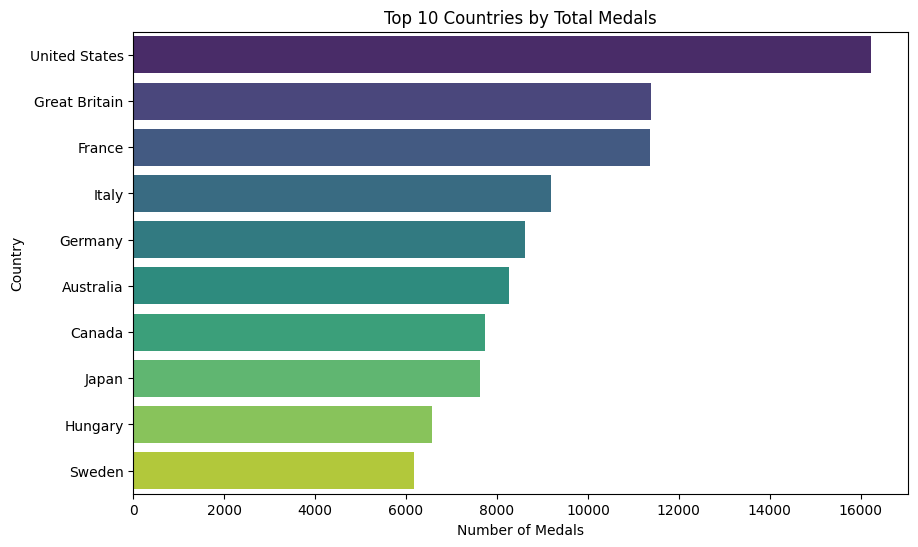

In [48]:
top_countries = df['Team'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Total Medals")
plt.xlabel("Number of Medals")
plt.ylabel("Country")
plt.show()


***2. Medals by Gender***

/tmp/ipython-input-2300482665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='coolwarm')


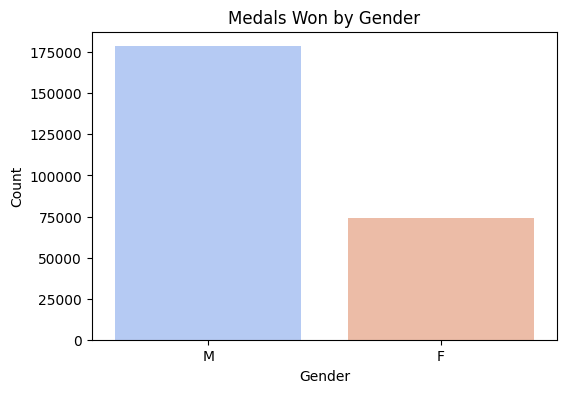

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df, palette='coolwarm')
plt.title("Medals Won by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


***3. Top 10 Sports by Number of Medals***

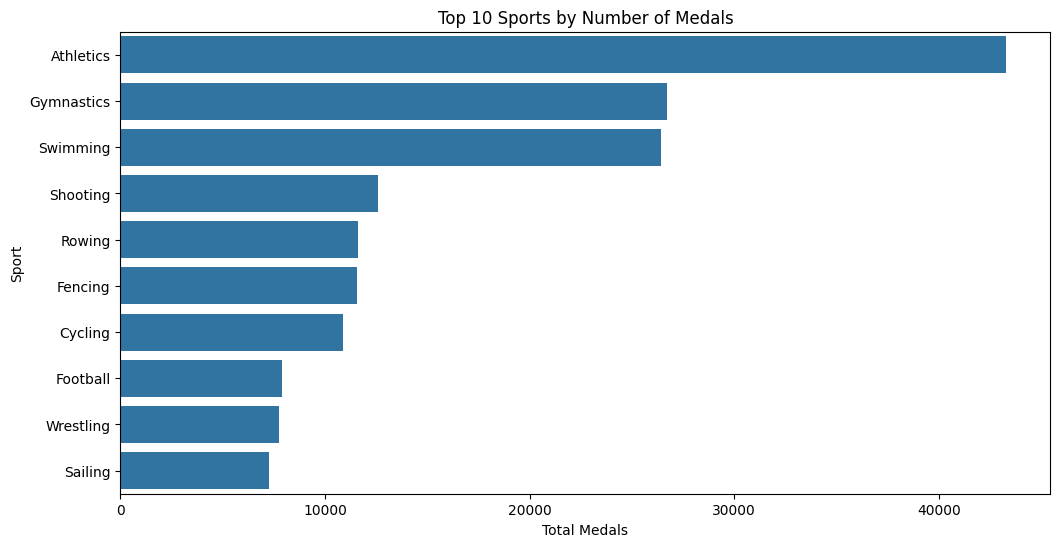

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(y='Sport', data=df, order=df['Sport'].value_counts().index[:10])
plt.title("Top 10 Sports by Number of Medals")
plt.ylabel("Sport")
plt.xlabel("Total Medals")
plt.show()


***4. Medal Trend Over Years***

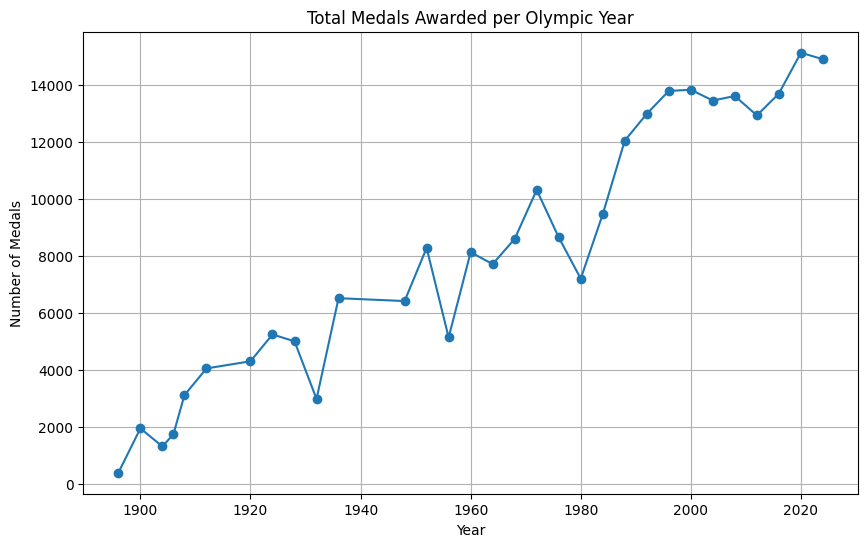

In [51]:
medals_per_year = df.groupby('Year')['Medal'].count().reset_index()

plt.figure(figsize=(10,6))
plt.plot(medals_per_year['Year'], medals_per_year['Medal'], marker='o')
plt.title("Total Medals Awarded per Olympic Year")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.grid(True)
plt.show()


***5. Country vs Year Heatmap (Top 10 Countries)***

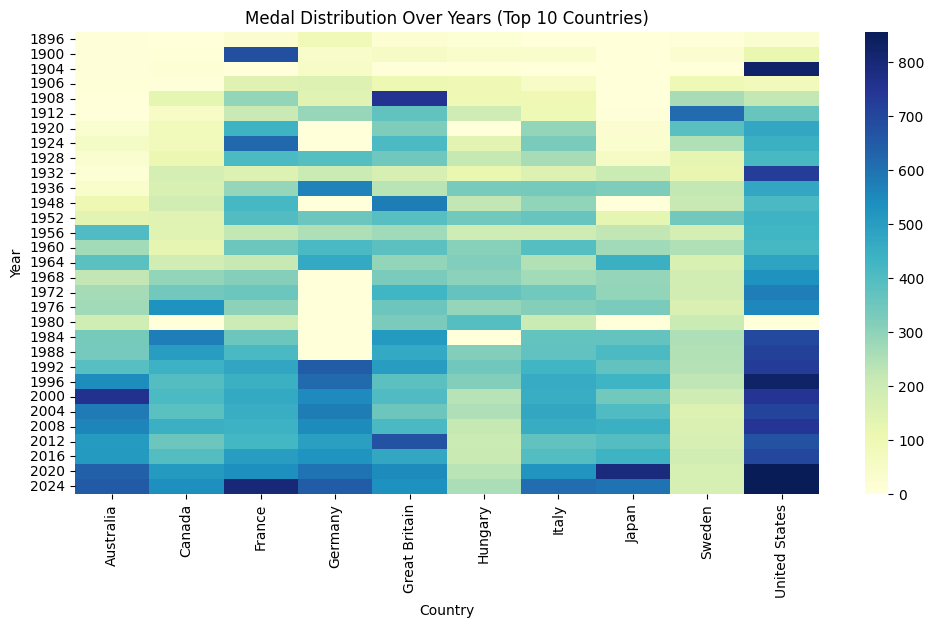

In [52]:
top10 = df['Team'].value_counts().head(10).index
heat_df = df[df['Team'].isin(top10)].groupby(['Year','Team']).size().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heat_df, cmap="YlGnBu")
plt.title("Medal Distribution Over Years (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Year")
plt.show()


***6: Medal Type Distribution (Gold, Silver, Bronze)***

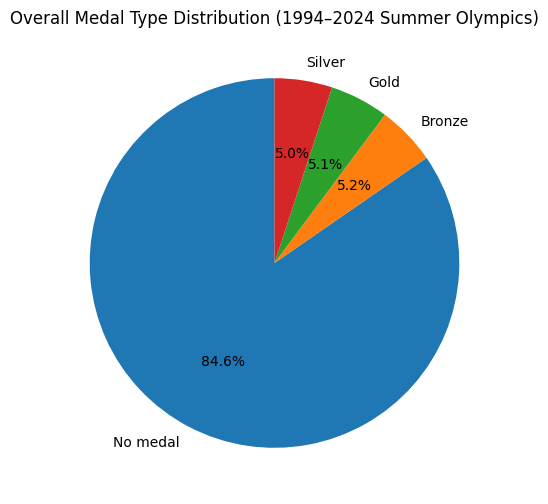

In [53]:
medal_counts = df['Medal'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Overall Medal Type Distribution (1994–2024 Summer Olympics)')
plt.show()